# Har vi funnet en av dødstalismanene?
### Computational essay av Nanna Bryne
### FYS2130 Svingninger og bølger (våren 2021)

Professor i fysikk Erik Adli har instruert oss ungdommer (les: tyveåringer) om "[...] grunnleggene aspekter om mekaniske og elektriske svingninger, samt en hel del om forskjellige typer bølger." (fra emnebeskrivelsen i FYS2130) Det vi ikke visste, var at han er på hemmelig oppdrag fra Galtvort, ute etter å finne en forsvunnet dødstalisman, nemlig Harry Potters usynlighetskappe. Som lærde i magiverdenen, har vi ikke oversett den skjulte agendaen, og anser det som vår plikt overfor rektor McSnurp å gjøre alt vi kan for å finne denne.

Sammen med medamatørfysiker Anna Pauline Hjertvik Aasen, skal jeg forsøke å bruke det vi har lært til å sette sammen usynlighetskappen. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def DeathlyHallows():
    cloak = np.array([[-1,0], [1,0], [0,1.35], [-1,0]])
    wand = np.array([[0,0], [0,1.35]])
    theta = np.linspace(0, 2*np.pi, 1000)
    stonex = 0.5*np.cos(theta)
    stoney = 0.5*np.sin(theta) + 0.5
    plt.plot(cloak[:,0], cloak[:,1], lw=3, c='olive')
    plt.plot(wand[:,0], wand[:,1], ls='--', c='grey')
    plt.plot(stonex, stoney, ls='--', c='grey')
    plt.axis('equal')
    plt.title('Dødstalismanene')
    plt.show()

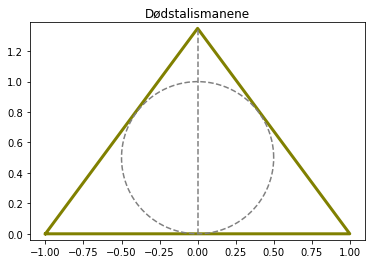

In [3]:
DeathlyHallows()

-0.8796953108920622


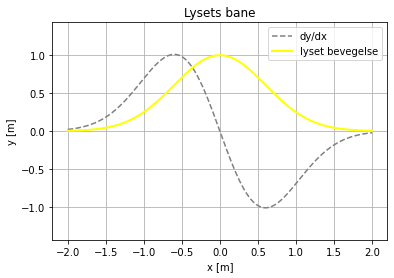

0.49999999999999994


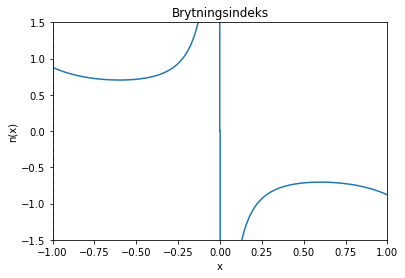

In [4]:


A = 1.5 # [m] høyde på kappe
sigma = 0.6
y = lambda x: A / (sigma * np.sqrt(2*np.pi)) * np.exp(- x**2 / (2*sigma**2))
yder = lambda x: -x/(sigma)**2 * y(x)

x0 = -1
theta0 = np.pi/6
theta_ = - np.arctan(yder(x0))
n0 = np.sin(theta0) / np.sin(theta_)
print(n0)

def ref_index(x, y=y, yder=yder):
    K = np.sin(theta0)
    print(K)

    n = lambda x: K * np.sqrt(1+yder(x)**2) / yder(x)

    N = n(x)

    #N[np.abs(N)>5] = 1
    N[np.abs(x)<0.002] = 0

    return N




x = np.linspace(-2, 2, 5000)
plt.plot(x, yder(x), c='grey', ls='--', label='dy/dx')
plt.plot(x, y(x), c='yellow', lw=2, label='lyset bevegelse')
plt.axis('equal')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Lysets bane')
plt.legend()
plt.grid('--')
plt.show()


n1 = ref_index(x)
plt.plot(x,n1)
plt.title('Brytningsindeks')
plt.axvline(x0, ls='--')
plt.axis([x0, -x0, -1.5, 1.5])
plt.xlabel('x')
plt.ylabel('n(x)')
plt.show()